In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import matplotlib as mpl
from util.stragglers import straggler_freq,task_hist,straggler_samples
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Single Core Task

In [2]:
singleCorePython = pd.DataFrame.from_csv('stragglers/tidy_data/SingleCore_104675.csv')
singleCoreCpp = pd.DataFrame.from_csv('stragglers/tidy_data/timings_104675.csv')

In [3]:
histSingleCorePython,edgesSingleCorePython = np.histogram(singleCorePython['Compute'].values,bins=100)
histSingleCoreCpp,edgesSingleCoreCpp = np.histogram((singleCoreCpp/1000000.0)['Execute'].values,bins=100)

histSingleCorePython = histSingleCorePython/len(singleCorePython['Compute'].values)
widthSingleCorePython = 0.9 * (edgesSingleCorePython[1] - edgesSingleCorePython[0])
centerSingleCorePython = (edgesSingleCorePython[:-1] + edgesSingleCorePython[1:]) / 2

histSingleCoreCpp = histSingleCoreCpp/len(singleCoreCpp['Execute'].values)
widthSingleCoreCpp = 0.9 * (edgesSingleCoreCpp[1] - edgesSingleCoreCpp[0])
centerSingleCoreCpp = (edgesSingleCoreCpp[:-1] + edgesSingleCoreCpp[1:]) / 2

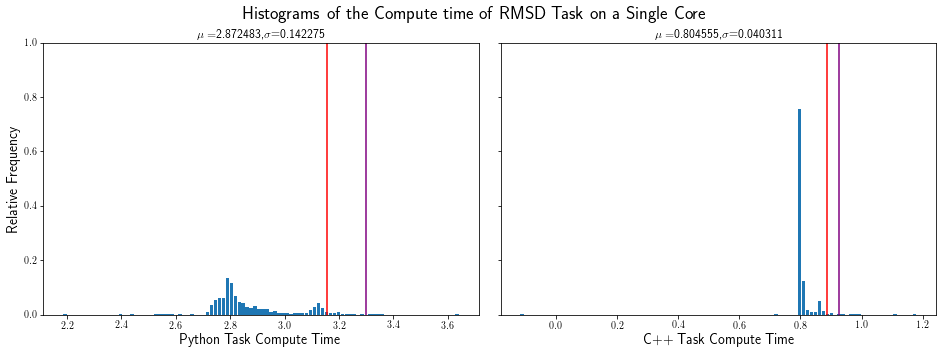

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=2, sharex=False,sharey=True,figsize=[16,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerSingleCorePython, histSingleCorePython, align='center', width=widthSingleCorePython)
axes[1].bar(centerSingleCoreCpp, histSingleCoreCpp, align='center', width=widthSingleCoreCpp)
fig.suptitle('Histograms of the Compute time of RMSD Task on a Single Core',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%(singleCorePython['Compute'].mean(),singleCorePython['Compute'].std()),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%((singleCoreCpp/1000000.0)['Execute'].mean(),(singleCoreCpp/1000000.0)['Execute'].std()),fontsize=12)
axes[0].set_xlabel('Python Task Compute Time', fontsize=14)
axes[1].set_xlabel('C++ Task Compute Time',fontsize=14)
axes[0].axvline(x=(singleCorePython['Compute'].mean()+2*singleCorePython['Compute'].std()),color='red')
axes[1].axvline(x=((singleCoreCpp/1000000.0)['Execute'].mean()+2*(singleCoreCpp/1000000.0)['Execute'].std()),color='red')
axes[0].axvline(x=(singleCorePython['Compute'].mean()+3*singleCorePython['Compute'].std()),color='purple')
axes[1].axvline(x=((singleCoreCpp/1000000.0)['Execute'].mean()+3*(singleCoreCpp/1000000.0)['Execute'].std()),color='purple')
axes[0].set_ylim([0,1])
axes[0].set_ylabel('Relative Frequency',fontsize=14)

# Parallel Execution with different frameworks

In [5]:
comet_mpi4py = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/comet_mpi4py_NoIO.csv').drop(['Framework'],axis=1)
comet_mpicpp = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/comet_mpic++_NoIO.csv').drop(['Framework'],axis=1)
comet_dask   = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/comet_dask_NoIO.csv').drop(['Framework'],axis=1)
comet_spark  = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/comet_spark_NoIO.csv').drop(['Framework'],axis=1)
comet_rp     = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/comet_rp_NoIO.csv').drop(['Framework'],axis=1)


In [6]:
wrangler_mpi4py = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/wrangler_mpi4py_NoIO.csv').drop(['Framework'],axis=1)
wrangler_mpicpp = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/wrangler_mpic++_NoIO.csv').drop(['Framework'],axis=1)
wrangler_dask   = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/wrangler_dask_NoIO.csv').drop(['Framework'],axis=1)
wrangler_spark  = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/wrangler_spark_NoIO.csv').drop(['Framework'],axis=1)
wrangler_rp     = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/wrangler_rp_NoIO.csv').drop(['Framework'],axis=1)



In [7]:
norm = 'mean'
Cmpi4pyS = straggler_samples(comet_mpi4py,norm)
CmpicppS = straggler_samples(comet_mpicpp,norm)
CdaskS   = straggler_samples(comet_dask,norm)
CsparkS  = straggler_samples(comet_spark,norm)
CrpS    =  straggler_samples(comet_rp,norm)

Wmpi4pyS = straggler_samples(wrangler_mpi4py,norm)
WmpicppS = straggler_samples(wrangler_mpicpp,norm)
WdaskS   = straggler_samples(wrangler_dask,norm)
WsparkS  = straggler_samples(wrangler_spark,norm)
WrpS    =  straggler_samples(wrangler_rp,norm)

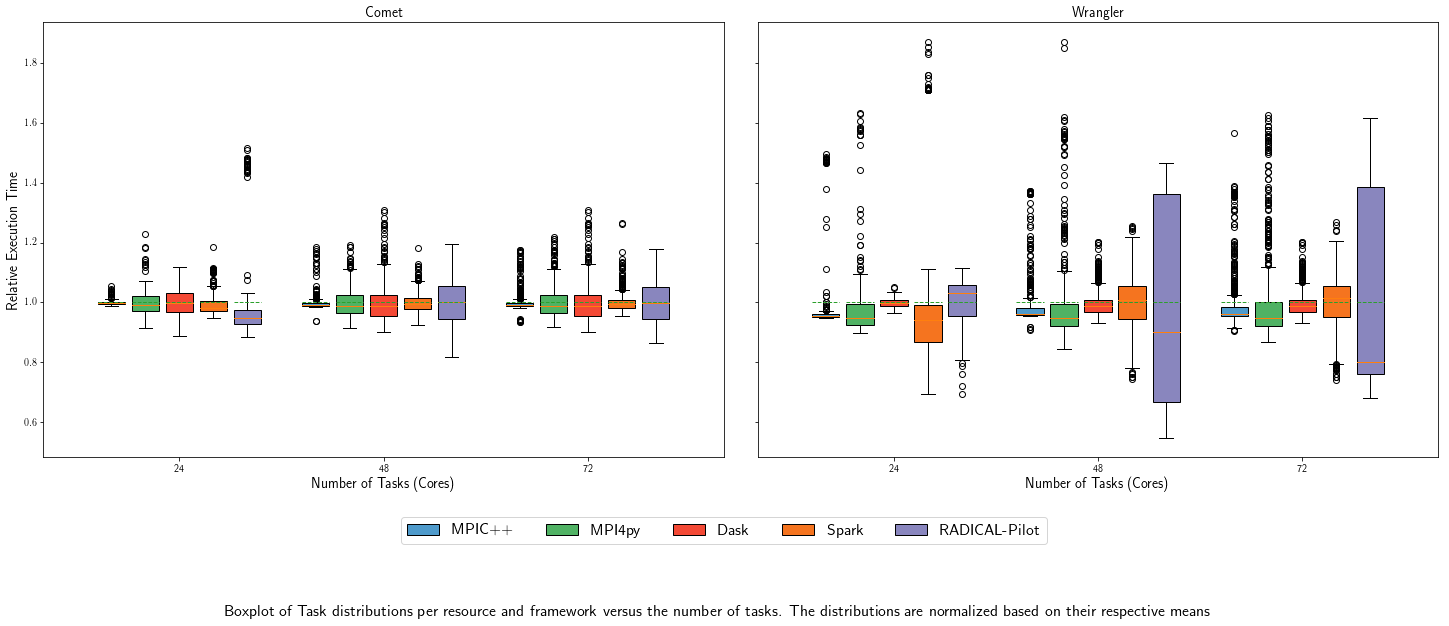

In [8]:
fig,axes = plt.subplots(nrows=1,ncols=2, sharex=True,sharey=True,figsize=[25,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})
x = np.arange(3)

bp1 = axes[0].boxplot([CmpicppS[0]['Duration'],CmpicppS[1]['Duration'],CmpicppS[2]['Duration']],boxprops=dict(facecolor=blues(150)),meanline=True,showcaps=True,showmeans=True,patch_artist=True,positions=[-0.5,1,2.5],widths=0.2)
bp2 = axes[0].boxplot([Cmpi4pyS[0]['Duration'],Cmpi4pyS[1]['Duration'],Cmpi4pyS[2]['Duration']],boxprops=dict(facecolor=greens(150)),meanline=True,showcaps=True,showmeans=True, patch_artist=True,positions=[-0.25,1.25,2.75],widths=0.2)
bp3 = axes[0].boxplot([CdaskS[0]['Duration'],CdaskS[1]['Duration'],CdaskS[2]['Duration']],boxprops=dict(facecolor=reds(150)),meanline=True,showcaps=True,showmeans=True, patch_artist=True,positions=[0,1.5,3],widths=0.2)
bp4 = axes[0].boxplot([CsparkS[0]['Duration'],CsparkS[1]['Duration'],CsparkS[2]['Duration']],boxprops=dict(facecolor=oranges(150)),meanline=True,showcaps=True,showmeans=True, patch_artist=True,positions=[0.25,1.75,3.25],widths=0.2)
bp5 = axes[0].boxplot([CrpS[0]['Duration'],CrpS[1]['Duration'],CrpS[2]['Duration']],boxprops=dict(facecolor=purples(150)),meanline=True,showcaps=True,showmeans=True, patch_artist=True,positions=[0.5,2,3.5],widths=0.2)

_ = axes[1].boxplot([WmpicppS[0]['Duration'],WmpicppS[1]['Duration'],WmpicppS[2]['Duration']],boxprops=dict(facecolor=blues(150)),meanline=True,showcaps=True,showmeans=True,patch_artist=True,positions=[-0.5,1,2.5],widths=0.2)
_ = axes[1].boxplot([Wmpi4pyS[0]['Duration'],Wmpi4pyS[1]['Duration'],Wmpi4pyS[2]['Duration']],boxprops=dict(facecolor=greens(150)),meanline=True,showcaps=True,showmeans=True, patch_artist=True,positions=[-0.25,1.25,2.75],widths=0.2)
_ = axes[1].boxplot([WdaskS[0]['Duration'],WdaskS[1]['Duration'],WdaskS[2]['Duration']],boxprops=dict(facecolor=reds(150)),meanline=True,showcaps=True,showmeans=True, patch_artist=True,positions=[0,1.5,3],widths=0.2)
_ = axes[1].boxplot([WsparkS[0]['Duration'],WsparkS[1]['Duration'],WsparkS[2]['Duration']],boxprops=dict(facecolor=oranges(150)),meanline=True,showcaps=True,showmeans=True, patch_artist=True,positions=[0.25,1.75,3.25],widths=0.2)
_ = axes[1].boxplot([WrpS[0]['Duration'],WrpS[1]['Duration'],WrpS[2]['Duration']],boxprops=dict(facecolor=purples(150)),meanline=True,showcaps=True,showmeans=True, patch_artist=True,positions=[0.5,2,3.5],widths=0.2)
axes[0].set_xticks([0,1.5,3])
axes[0].set_xticklabels([24,48,72])
axes[0].set_xlim([-1,4])
axes[0].set_title('Comet',fontsize=14)
axes[1].set_title('Wrangler',fontsize=14)
axes[0].set_xlabel('Number of Tasks (Cores)',fontsize=14)
axes[1].set_xlabel('Number of Tasks (Cores)',fontsize=14)
axes[0].set_ylabel('Relative Execution Time',fontsize=14)
axes[0].legend([bp1["boxes"][0], bp2["boxes"][0],bp3["boxes"][0],bp4["boxes"][0],bp5["boxes"][0]],['MPIC++','MPI4py','Dask','Spark','RADICAL-Pilot'],fontsize=16,bbox_to_anchor=(0.,-.20, 2,0), loc='lower center',ncol=5, borderaxespad=0.)
fig.text(.5, -.15, 'Boxplot of Task distributions per resource and framework versus the number of tasks. The distributions are normalized based on their respective means', ha='center',fontsize=16)

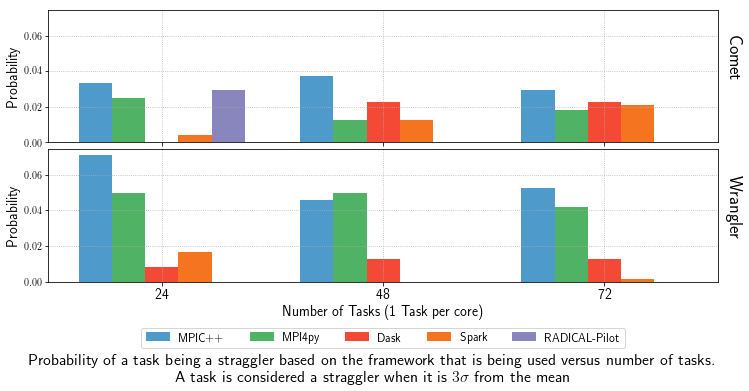

In [9]:
mult = 3
Cmpi4pyS = straggler_freq(comet_mpi4py,mult)
CmpicppS = straggler_freq(comet_mpicpp,mult)
CdaskS   = straggler_freq(comet_dask,mult)
CsparkS  = straggler_freq(comet_spark,mult)
CrpS     = straggler_freq(comet_rp,mult)

Wmpi4pyS = straggler_freq(wrangler_mpi4py,mult)
WmpicppS = straggler_freq(wrangler_mpicpp,mult)
WdaskS   = straggler_freq(wrangler_dask,mult)
WsparkS  = straggler_freq(wrangler_spark,mult)
WrpS     =  straggler_freq(wrangler_rp,mult)

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
x = np.arange(3)
width = 0.15
axes[0].bar(x-2*width,CmpicppS,color=blues(150),width=width,label='MPIC++')
axes[0].bar(x-width,Cmpi4pyS,color=greens(150),width=width,label='MPI4py')
axes[0].bar(x+0*width,CdaskS,color=reds(150),width=width,label='Dask')
axes[0].bar(x+1*width,CsparkS,color=oranges(150),width=width,label='Spark')
axes[0].bar(x+2*width,CrpS,color=purples(150),width=width,label='RADICAL-Pilot')

axes[1].bar(x-2*width,WmpicppS,color=blues(150),width=width,label='MPIC++')
axes[1].bar(x-width,Wmpi4pyS,color=greens(150),width=width,label='MPI4py')
axes[1].bar(x+0*width,WdaskS,color=reds(150),width=width,label='Dask')
axes[1].bar(x+1*width,WsparkS,color=oranges(150),width=width,label='Spark')
axes[1].bar(x+2*width,WrpS,color=purples(150),width=width,label='RADICAL-Pilot')
axes[0].grid('on',which='both',linestyle=':')
axes[1].grid('on',which='both',linestyle=':')
axes[1].set_xlabel('Number of Tasks (1 Task per core)',fontsize=14)
axes[1].set_xticks([0,1,2])
axes[1].set_xticklabels(['24','48','72'],fontsize=14)
axes[0].set_ylabel('Probability',fontsize=14)
axes[1].set_ylabel('Probability',fontsize=14)
axes[0].text(2.55,0.06, 'Comet',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1].text(2.55,.06, 'Wrangler',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1].legend(['MPIC++','MPI4py','Dask','Spark','RADICAL-Pilot'],fontsize=12,bbox_to_anchor=(0., -.5, 1,0), loc='lower center',ncol=5, borderaxespad=0.)
fig.text(.5, -.15, 'Probability of a task being a straggler based on the framework that is being used versus number of tasks.\
                  \nA task is considered a straggler when it is $3\sigma$ from the mean', ha='center',fontsize=16)
#fig.savefig('straggler_prob_NoIOweak3sigma.pdf',dpi=800,bbox_inches='tight',pad_inches=0)

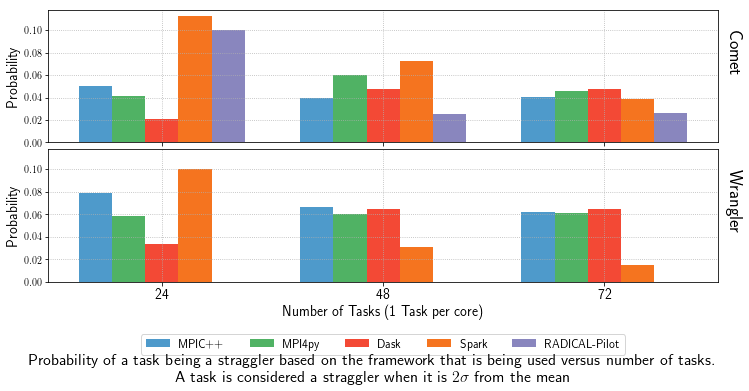

In [10]:
mult = 2
Cmpi4pyS = straggler_freq(comet_mpi4py,mult)
CmpicppS = straggler_freq(comet_mpicpp,mult)
CdaskS   = straggler_freq(comet_dask,mult)
CsparkS  = straggler_freq(comet_spark,mult)
CrpS     = straggler_freq(comet_rp,mult)

Wmpi4pyS = straggler_freq(wrangler_mpi4py,mult)
WmpicppS = straggler_freq(wrangler_mpicpp,mult)
WdaskS   = straggler_freq(wrangler_dask,mult)
WsparkS  = straggler_freq(wrangler_spark,mult)
WrpS     =  straggler_freq(wrangler_rp,mult)

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
x = np.arange(3)
width = 0.15
axes[0].bar(x-2*width,CmpicppS,color=blues(150),width=width,label='MPIC++')
axes[0].bar(x-width,Cmpi4pyS,color=greens(150),width=width,label='MPI4py')
axes[0].bar(x+0*width,CdaskS,color=reds(150),width=width,label='Dask')
axes[0].bar(x+1*width,CsparkS,color=oranges(150),width=width,label='Spark')
axes[0].bar(x+2*width,CrpS,color=purples(150),width=width,label='RADICAL-Pilot')

axes[1].bar(x-2*width,WmpicppS,color=blues(150),width=width,label='MPIC++')
axes[1].bar(x-width,Wmpi4pyS,color=greens(150),width=width,label='MPI4py')
axes[1].bar(x+0*width,WdaskS,color=reds(150),width=width,label='Dask')
axes[1].bar(x+1*width,WsparkS,color=oranges(150),width=width,label='Spark')
axes[1].bar(x+2*width,WrpS,color=purples(150),width=width,label='RADICAL-Pilot')
axes[0].grid('on',which='both',linestyle=':')
axes[1].grid('on',which='both',linestyle=':')
axes[1].set_xlabel('Number of Tasks (1 Task per core)',fontsize=14)
axes[1].set_xticks([0,1,2])
axes[1].set_xticklabels(['24','48','72'],fontsize=14)
axes[0].set_ylabel('Probability',fontsize=14)
axes[1].set_ylabel('Probability',fontsize=14)
axes[0].text(2.55,0.1, 'Comet',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1].text(2.55,.1, 'Wrangler',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1].legend(['MPIC++','MPI4py','Dask','Spark','RADICAL-Pilot'],fontsize=12,bbox_to_anchor=(0., -.55, 1,0), loc='lower center',ncol=5, borderaxespad=0.)
fig.text(.5, -.15, 'Probability of a task being a straggler based on the framework that is being used versus number of tasks.\
                  \nA task is considered a straggler when it is $2\sigma$ from the mean', ha='center',fontsize=16)
#fig.savefig('straggler_prob_NoIOweak2sigma.pdf',dpi=800,bbox_inches='tight',pad_inches=0)

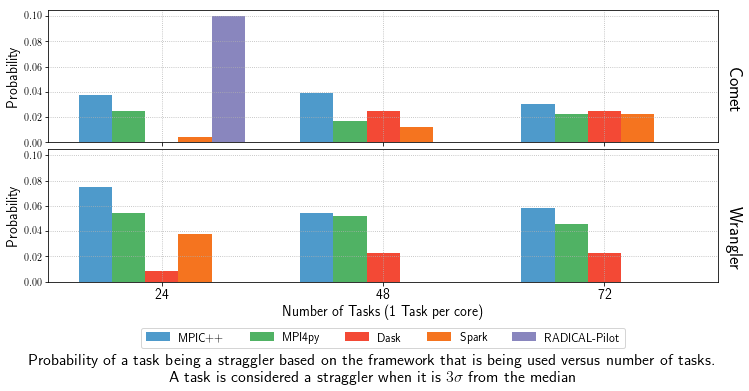

In [11]:
mult = 3
Cmpi4pyS = straggler_freq(comet_mpi4py,mult=mult,center='median')
CmpicppS = straggler_freq(comet_mpicpp,mult=mult,center='median')
CdaskS   = straggler_freq(comet_dask,mult=mult,center='median')
CsparkS  = straggler_freq(comet_spark,mult=mult,center='median')
CrpS     = straggler_freq(comet_rp,mult=mult,center='median')

Wmpi4pyS = straggler_freq(wrangler_mpi4py,mult=mult,center='median')
WmpicppS = straggler_freq(wrangler_mpicpp,mult=mult,center='median')
WdaskS   = straggler_freq(wrangler_dask,mult=mult,center='median')
WsparkS  = straggler_freq(wrangler_spark,mult=mult,center='median')
WrpS     =  straggler_freq(wrangler_rp,mult)

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
x = np.arange(3)
width = 0.15
axes[0].bar(x-2*width,CmpicppS,color=blues(150),width=width,label='MPIC++')
axes[0].bar(x-width,Cmpi4pyS,color=greens(150),width=width,label='MPI4py')
axes[0].bar(x+0*width,CdaskS,color=reds(150),width=width,label='Dask')
axes[0].bar(x+1*width,CsparkS,color=oranges(150),width=width,label='Spark')
axes[0].bar(x+2*width,CrpS,color=purples(150),width=width,label='RADICAL-Pilot')

axes[1].bar(x-2*width,WmpicppS,color=blues(150),width=width,label='MPIC++')
axes[1].bar(x-width,Wmpi4pyS,color=greens(150),width=width,label='MPI4py')
axes[1].bar(x+0*width,WdaskS,color=reds(150),width=width,label='Dask')
axes[1].bar(x+1*width,WsparkS,color=oranges(150),width=width,label='Spark')
axes[1].bar(x+2*width,WrpS,color=purples(150),width=width,label='RADICAL-Pilot')
axes[0].grid('on',which='both',linestyle=':')
axes[1].grid('on',which='both',linestyle=':')
axes[1].set_xlabel('Number of Tasks (1 Task per core)',fontsize=14)
axes[1].set_xticks([0,1,2])
axes[1].set_xticklabels(['24','48','72'],fontsize=14)
axes[0].set_ylabel('Probability',fontsize=14)
axes[1].set_ylabel('Probability',fontsize=14)
axes[0].text(2.55,0.06, 'Comet',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1].text(2.55,.06, 'Wrangler',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1].legend(['MPIC++','MPI4py','Dask','Spark','RADICAL-Pilot'],fontsize=12,bbox_to_anchor=(0., -.5, 1,0), loc='lower center',ncol=5, borderaxespad=0.)
fig.text(.5, -.15, 'Probability of a task being a straggler based on the framework that is being used versus number of tasks.\
                  \nA task is considered a straggler when it is $3\sigma$ from the median', ha='center',fontsize=16)
#fig.savefig('straggler_prob_NoIOweak3sigmaM.pdf',dpi=800,bbox_inches='tight',pad_inches=0)

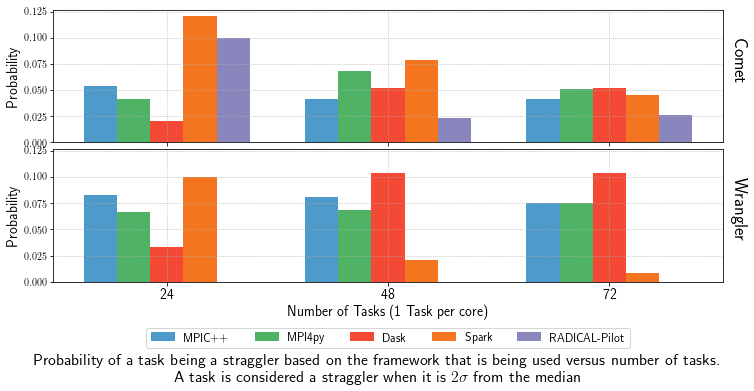

In [33]:
mult = 2
Cmpi4pyS = straggler_freq(comet_mpi4py,mult=mult,center='median')
CmpicppS = straggler_freq(comet_mpicpp,mult=mult,center='median')
CdaskS   = straggler_freq(comet_dask,mult=mult,center='median')
CsparkS  = straggler_freq(comet_spark,mult=mult,center='median')
CrpS     = straggler_freq(comet_rp,mult=mult,center='median')

Wmpi4pyS = straggler_freq(wrangler_mpi4py,mult=mult,center='median')
WmpicppS = straggler_freq(wrangler_mpicpp,mult=mult,center='median')
WdaskS   = straggler_freq(wrangler_dask,mult=mult,center='median')
WsparkS  = straggler_freq(wrangler_spark,mult=mult,center='median')
WrpS     =  straggler_freq(wrangler_rp,mult)
fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
x = np.arange(3)
width = 0.15
axes[0].bar(x-2*width,CmpicppS,color=blues(150),width=width,label='MPIC++')
axes[0].bar(x-width,Cmpi4pyS,color=greens(150),width=width,label='MPI4py')
axes[0].bar(x+0*width,CdaskS,color=reds(150),width=width,label='Dask')
axes[0].bar(x+1*width,CsparkS,color=oranges(150),width=width,label='Spark')
axes[0].bar(x+2*width,CrpS,color=purples(150),width=width,label='RADICAL-Pilot')

axes[1].bar(x-2*width,WmpicppS,color=blues(150),width=width,label='MPIC++')
axes[1].bar(x-width,Wmpi4pyS,color=greens(150),width=width,label='MPI4py')
axes[1].bar(x+0*width,WdaskS,color=reds(150),width=width,label='Dask')
axes[1].bar(x+1*width,WsparkS,color=oranges(150),width=width,label='Spark')
axes[1].bar(x+2*width,WrpS,color=purples(150),width=width,label='RADICAL-Pilot')
axes[0].grid('on',which='both',linestyle=':')
axes[1].grid('on',which='both',linestyle=':')
axes[1].set_xlabel('Number of Tasks (1 Task per core)',fontsize=14)
axes[1].set_xticks([0,1,2])
axes[1].set_xticklabels(['24','48','72'],fontsize=14)
axes[0].set_ylabel('Probability',fontsize=14)
axes[1].set_ylabel('Probability',fontsize=14)
axes[0].text(2.55,0.1, 'Comet',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1].text(2.55,.1, 'Wrangler',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1].legend(['MPIC++','MPI4py','Dask','Spark','RADICAL-Pilot'],fontsize=12,bbox_to_anchor=(0., -.5, 1,0), loc='lower center',ncol=5, borderaxespad=0.)
fig.text(.5, -.15, 'Probability of a task being a straggler based on the framework that is being used versus number of tasks.\
                  \nA task is considered a straggler when it is $2\sigma$ from the median', ha='center',fontsize=16)
#fig.savefig('straggler_prob_NoIOweak2sigmaM.pdf',dpi=800,bbox_inches='tight',pad_inches=0)

# Histograms of gathered data

In [13]:
histCometMpiCPP1,edgesCometMpiCPP1,meanCometMpiCPP1,stdCometMpiCPP1,_ = task_hist(df=comet_mpicpp,node=1,bins=20,div=1000000.0)
histCometMpiCPP2,edgesCometMpiCPP2,meanCometMpiCPP2,stdCometMpiCPP2,_ = task_hist(df=comet_mpicpp,node=2,bins=40,div=1000000.0)
histCometMpiCPP3,edgesCometMpiCPP3,meanCometMpiCPP3,stdCometMpiCPP3,_ = task_hist(df=comet_mpicpp,node=3,bins=80,div=1000000.0)

widthCometMpiCPP1 = 0.9 * (edgesCometMpiCPP1[1] - edgesCometMpiCPP1[0])
centerCometMpiCPP1 = (edgesCometMpiCPP1[:-1] + edgesCometMpiCPP1[1:]) / 2

widthCometMpiCPP2 = 0.9 * (edgesCometMpiCPP2[1] - edgesCometMpiCPP2[0])
centerCometMpiCPP2 = (edgesCometMpiCPP2[:-1] + edgesCometMpiCPP2[1:]) / 2

widthCometMpiCPP3 = 0.9 * (edgesCometMpiCPP3[1] - edgesCometMpiCPP3[0])
centerCometMpiCPP3 = (edgesCometMpiCPP3[:-1] + edgesCometMpiCPP3[1:]) / 2

print 'Comet',meanCometMpiCPP1,stdCometMpiCPP1
print 'Comet',meanCometMpiCPP2,stdCometMpiCPP2
print 'Comet',meanCometMpiCPP3,stdCometMpiCPP3

Comet 1.07360545833 0.0103789554842
Comet 1.50372960648 0.0466028533385
Comet 1.50321001389 0.0427714297182


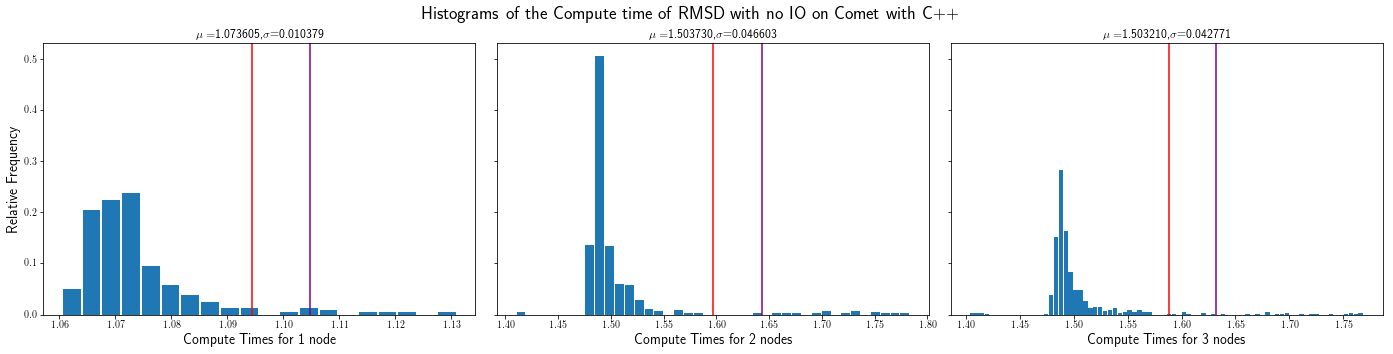

In [14]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],
                        gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerCometMpiCPP1, histCometMpiCPP1, align='center', width=widthCometMpiCPP1)
axes[1].bar(centerCometMpiCPP2, histCometMpiCPP2, align='center', width=widthCometMpiCPP2)
axes[2].bar(centerCometMpiCPP3, histCometMpiCPP3, align='center', width=widthCometMpiCPP3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Comet with C++',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%(meanCometMpiCPP1,stdCometMpiCPP1),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%(meanCometMpiCPP2,stdCometMpiCPP2),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%(meanCometMpiCPP3,stdCometMpiCPP3),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].axvline(x=(meanCometMpiCPP1+2*stdCometMpiCPP1),color='red')
axes[1].axvline(x=(meanCometMpiCPP2+2*stdCometMpiCPP2),color='red')
axes[2].axvline(x=(meanCometMpiCPP3+2*stdCometMpiCPP3),color='red')
axes[0].axvline(x=(meanCometMpiCPP1+3*stdCometMpiCPP1),color='purple')
axes[1].axvline(x=(meanCometMpiCPP2+3*stdCometMpiCPP2),color='purple')
axes[2].axvline(x=(meanCometMpiCPP3+3*stdCometMpiCPP3),color='purple')
axes[0].set_ylabel('Relative Frequency',fontsize=14)

In [15]:
histWranglerMpiCPP1,edgesWranglerMpiCPP1,meanWranglerMpiCPP1,stdWranglerMpiCPP1,_ = task_hist(df=wrangler_mpicpp,node=1,bins=20,div=1000000.0)
histWranglerMpiCPP2,edgesWranglerMpiCPP2,meanWranglerMpiCPP2,stdWranglerMpiCPP2,_ = task_hist(df=wrangler_mpicpp,node=2,bins=40,div=1000000.0)
histWranglerMpiCPP3,edgesWranglerMpiCPP3,meanWranglerMpiCPP3,stdWranglerMpiCPP3,_ = task_hist(df=wrangler_mpicpp,node=3,bins=80,div=1000000.0)

widthWranglerMpiCPP1 = 0.9 * (edgesWranglerMpiCPP1[1] - edgesWranglerMpiCPP1[0])
centerWranglerMpiCPP1 = (edgesWranglerMpiCPP1[:-1] + edgesWranglerMpiCPP1[1:]) / 2

widthWranglerMpiCPP2 = 0.9 * (edgesWranglerMpiCPP2[1] - edgesWranglerMpiCPP2[0])
centerWranglerMpiCPP2 = (edgesWranglerMpiCPP2[:-1] + edgesWranglerMpiCPP2[1:]) / 2

widthWranglerMpiCPP3 = 0.9 * (edgesWranglerMpiCPP3[1] - edgesWranglerMpiCPP3[0])
centerWranglerMpiCPP3 = (edgesWranglerMpiCPP3[:-1] + edgesWranglerMpiCPP3[1:]) / 2

print 'Wrangler',meanWranglerMpiCPP1,stdWranglerMpiCPP1
print 'Wrangler',meanWranglerMpiCPP2,stdWranglerMpiCPP2
print 'Wrangler',meanWranglerMpiCPP3,stdWranglerMpiCPP3

Wrangler 1.1146075 0.15354635428
Wrangler 1.5452546875 0.149073565481
Wrangler 1.54882084722 0.153097554981


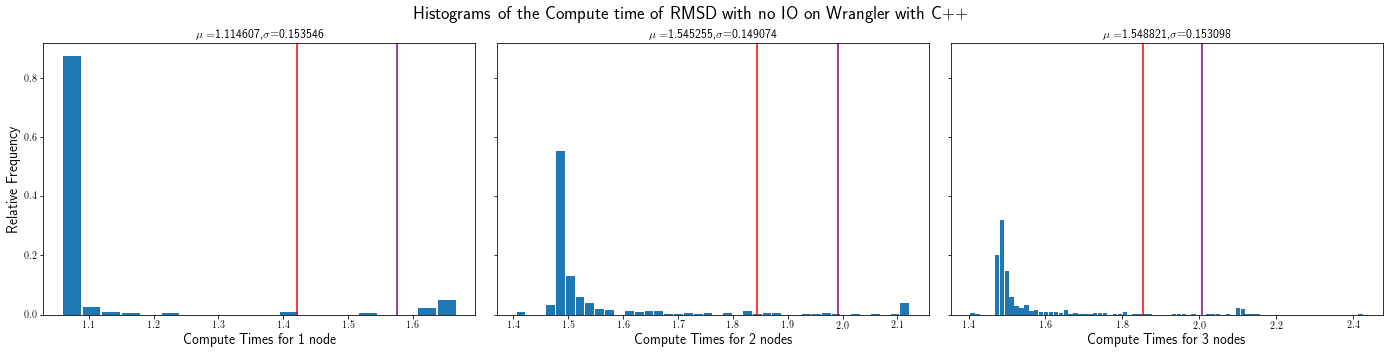

In [16]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],
                        gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerWranglerMpiCPP1, histWranglerMpiCPP1, align='center', width=widthWranglerMpiCPP1)
axes[1].bar(centerWranglerMpiCPP2, histWranglerMpiCPP2, align='center', width=widthWranglerMpiCPP2)
axes[2].bar(centerWranglerMpiCPP3, histWranglerMpiCPP3, align='center', width=widthWranglerMpiCPP3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Wrangler with C++',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%(meanWranglerMpiCPP1,stdWranglerMpiCPP1),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%(meanWranglerMpiCPP2,stdWranglerMpiCPP2),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%(meanWranglerMpiCPP3,stdWranglerMpiCPP3),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].axvline(x=(meanWranglerMpiCPP1+2*stdWranglerMpiCPP1),color='red')
axes[1].axvline(x=(meanWranglerMpiCPP2+2*stdWranglerMpiCPP2),color='red')
axes[2].axvline(x=(meanWranglerMpiCPP3+2*stdWranglerMpiCPP3),color='red')
axes[0].axvline(x=(meanWranglerMpiCPP1+3*stdWranglerMpiCPP1),color='purple')
axes[1].axvline(x=(meanWranglerMpiCPP2+3*stdWranglerMpiCPP2),color='purple')
axes[2].axvline(x=(meanWranglerMpiCPP3+3*stdWranglerMpiCPP3),color='purple')
axes[0].set_ylabel('Relative Frequency',fontsize=14)

In [17]:
histCometMpi4py1,edgesCometMpi4py1,meanCometMpi4py1,stdCometMpi4py1,_ = task_hist(df=comet_mpi4py,node=1,bins=20)
histCometMpi4py2,edgesCometMpi4py2,meanCometMpi4py2,stdCometMpi4py2,_ = task_hist(df=comet_mpi4py,node=2,bins=40)
histCometMpi4py3,edgesCometMpi4py3,meanCometMpi4py3,stdCometMpi4py3,_ = task_hist(df=comet_mpi4py,node=3,bins=80)

widthCometMpi4py1 = 0.9 * (edgesCometMpi4py1[1] - edgesCometMpi4py1[0])
centerCometMpi4py1 = (edgesCometMpi4py1[:-1] + edgesCometMpi4py1[1:]) / 2

widthCometMpi4py2 = 0.9 * (edgesCometMpi4py2[1] - edgesCometMpi4py2[0])
centerCometMpi4py2 = (edgesCometMpi4py2[:-1] + edgesCometMpi4py2[1:]) / 2

widthCometMpi4py3 = 0.9 * (edgesCometMpi4py3[1] - edgesCometMpi4py3[0])
centerCometMpi4py3 = (edgesCometMpi4py3[:-1] + edgesCometMpi4py3[1:]) / 2

print 'Comet',meanCometMpi4py1,stdCometMpi4py1
print 'Comet',meanCometMpi4py2,stdCometMpi4py2
print 'Comet',meanCometMpi4py3,stdCometMpi4py3

Comet 3.31049622099 0.150696541025
Comet 3.3130879273 0.159279385962
Comet 3.28747120433 0.164109506349


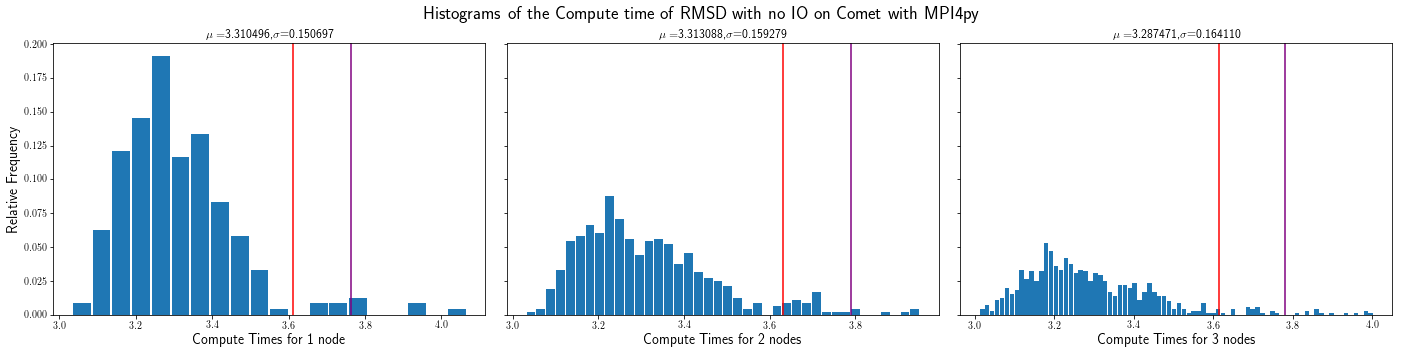

In [18]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerCometMpi4py1, histCometMpi4py1, align='center', width=widthCometMpi4py1)
axes[1].bar(centerCometMpi4py2, histCometMpi4py2, align='center', width=widthCometMpi4py2)
axes[2].bar(centerCometMpi4py3, histCometMpi4py3, align='center', width=widthCometMpi4py3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Comet with MPI4py',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%(meanCometMpi4py1,stdCometMpi4py1),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%(meanCometMpi4py2,stdCometMpi4py2),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%(meanCometMpi4py3,stdCometMpi4py3),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].axvline(x=(meanCometMpi4py1+2*stdCometMpi4py1),color='red')
axes[1].axvline(x=(meanCometMpi4py2+2*stdCometMpi4py2),color='red')
axes[2].axvline(x=(meanCometMpi4py3+2*stdCometMpi4py3),color='red')
axes[0].axvline(x=(meanCometMpi4py1+3*stdCometMpi4py1),color='purple')
axes[1].axvline(x=(meanCometMpi4py2+3*stdCometMpi4py2),color='purple')
axes[2].axvline(x=(meanCometMpi4py3+3*stdCometMpi4py3),color='purple')
axes[0].set_ylabel('Relative Frequency',fontsize=14)

In [19]:
histWranglerMpi4py1,edgesWranglerMpi4py1,meanWranglerMpi4py1,stdWranglerMpi4py1,_ = task_hist(df=wrangler_mpi4py,node=1,bins=20)
histWranglerMpi4py2,edgesWranglerMpi4py2,meanWranglerMpi4py2,stdWranglerMpi4py2,_ = task_hist(df=wrangler_mpi4py,node=2,bins=40)
histWranglerMpi4py3,edgesWranglerMpi4py3,meanWranglerMpi4py3,stdWranglerMpi4py3,_ = task_hist(df=wrangler_mpi4py,node=3,bins=80)

widthWranglerMpi4py1 = 0.9 * (edgesWranglerMpi4py1[1] - edgesWranglerMpi4py1[0])
centerWranglerMpi4py1 = (edgesWranglerMpi4py1[:-1] + edgesWranglerMpi4py1[1:]) / 2

widthWranglerMpi4py2 = 0.9 * (edgesWranglerMpi4py2[1] - edgesWranglerMpi4py2[0])
centerWranglerMpi4py2 = (edgesWranglerMpi4py2[:-1] + edgesWranglerMpi4py2[1:]) / 2

widthWranglerMpi4py3 = 0.9 * (edgesWranglerMpi4py3[1] - edgesWranglerMpi4py3[0])
centerWranglerMpi4py3 = (edgesWranglerMpi4py3[:-1] + edgesWranglerMpi4py3[1:]) / 2

print 'Wrangler',meanWranglerMpi4py1,stdWranglerMpi4py1
print 'Wrangler',meanWranglerMpi4py2,stdWranglerMpi4py2
print 'Wrangler',meanWranglerMpi4py3,stdWranglerMpi4py3

Wrangler 3.0840688765 0.469705972487
Wrangler 3.16518600037 0.50757488232
Wrangler 3.15510389606 0.457583772701


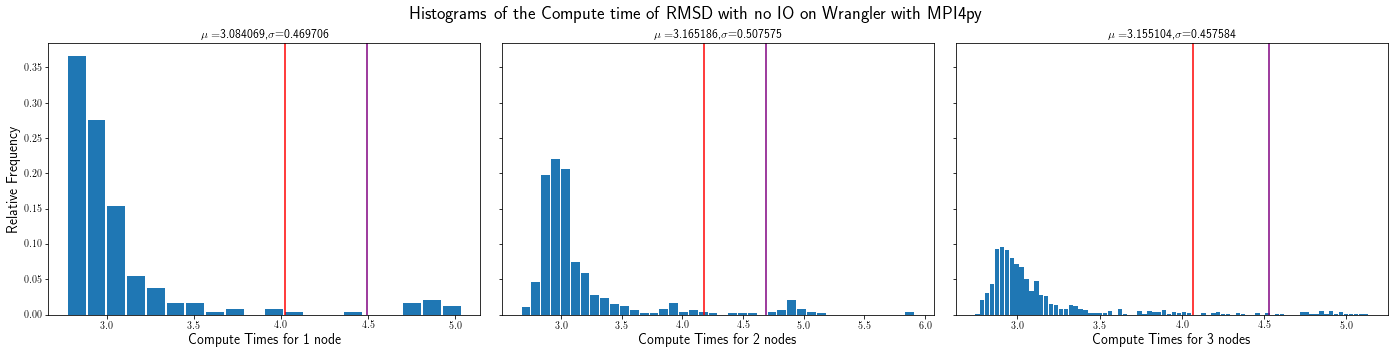

In [20]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerWranglerMpi4py1, histWranglerMpi4py1, align='center', width=widthWranglerMpi4py1)
axes[1].bar(centerWranglerMpi4py2, histWranglerMpi4py2, align='center', width=widthWranglerMpi4py2)
axes[2].bar(centerWranglerMpi4py3, histWranglerMpi4py3, align='center', width=widthWranglerMpi4py3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Wrangler with MPI4py',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%(meanWranglerMpi4py1,stdWranglerMpi4py1),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%(meanWranglerMpi4py2,stdWranglerMpi4py2),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%(meanWranglerMpi4py3,stdWranglerMpi4py3),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].axvline(x=(meanWranglerMpi4py1+2*stdWranglerMpi4py1),color='red')
axes[1].axvline(x=(meanWranglerMpi4py2+2*stdWranglerMpi4py2),color='red')
axes[2].axvline(x=(meanWranglerMpi4py3+2*stdWranglerMpi4py3),color='red')
axes[0].axvline(x=(meanWranglerMpi4py1+3*stdWranglerMpi4py1),color='purple')
axes[1].axvline(x=(meanWranglerMpi4py2+3*stdWranglerMpi4py2),color='purple')
axes[2].axvline(x=(meanWranglerMpi4py3+3*stdWranglerMpi4py3),color='purple')
axes[0].set_ylabel('Relative Frequency',fontsize=14)

In [21]:
histCometDask1,edgesCometDask1,meanCometDask1,stdCometDask1,_ = task_hist(df=comet_dask,div=1000.0,node=1,bins=20)
histCometDask2,edgesCometDask2,meanCometDask2,stdCometDask2,_ = task_hist(df=comet_dask,div=1000.0,node=2,bins=40)
histCometDask3,edgesCometDask3,meanCometDask3,stdCometDask3,_ = task_hist(df=comet_dask,div=1000.0,node=3,bins=80)

widthCometDask1 = 0.9 * (edgesCometDask1[1] - edgesCometDask1[0])
centerCometDask1 = (edgesCometDask1[:-1] + edgesCometDask1[1:]) / 2

widthCometDask2 = 0.9 * (edgesCometDask2[1] - edgesCometDask2[0])
centerCometDask2 = (edgesCometDask2[:-1] + edgesCometDask2[1:]) / 2

widthCometDask3 = 0.9 * (edgesCometDask3[1] - edgesCometDask3[0])
centerCometDask3 = (edgesCometDask3[:-1] + edgesCometDask3[1:]) / 2

print 'Comet',meanCometDask1,stdCometDask1
print 'Comet',meanCometDask2,stdCometDask2
print 'Comet',meanCometDask3,stdCometDask3

Comet 3.7693911622 0.175257600506
Comet 3.87585599323 0.256302400664
Comet 3.87585599323 0.256302400664


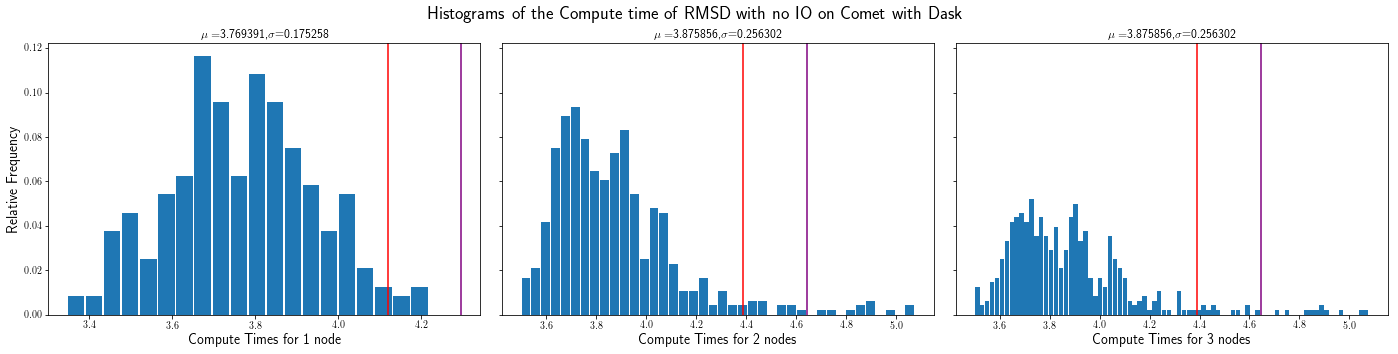

In [22]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerCometDask1, histCometDask1, align='center', width=widthCometDask1)
axes[1].bar(centerCometDask2, histCometDask2, align='center', width=widthCometDask2)
axes[2].bar(centerCometDask3, histCometDask3, align='center', width=widthCometDask3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Comet with Dask',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%(meanCometDask1,stdCometDask1),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%(meanCometDask2,stdCometDask2),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%(meanCometDask3,stdCometDask3),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].axvline(x=(meanCometDask1+2*stdCometDask1),color='red')
axes[1].axvline(x=(meanCometDask2+2*stdCometDask2),color='red')
axes[2].axvline(x=(meanCometDask3+2*stdCometDask3),color='red')
axes[0].axvline(x=(meanCometDask1+3*stdCometDask1),color='purple')
axes[1].axvline(x=(meanCometDask2+3*stdCometDask2),color='purple')
axes[2].axvline(x=(meanCometDask3+3*stdCometDask3),color='purple')
axes[0].set_ylabel('Relative Frequency',fontsize=14)

In [23]:
histWranglerDask1,edgesWranglerDask1,meanWranglerDask1,stdWranglerDask1,_ = task_hist(df=wrangler_dask,div=1000.0,node=1,bins=20)
histWranglerDask2,edgesWranglerDask2,meanWranglerDask2,stdWranglerDask2,_ = task_hist(df=wrangler_dask,div=1000.0,node=2,bins=40)
histWranglerDask3,edgesWranglerDask3,meanWranglerDask3,stdWranglerDask3,_ = task_hist(df=wrangler_dask,div=1000.0,node=3,bins=80)

widthWranglerDask1 = 0.9 * (edgesWranglerDask1[1] - edgesWranglerDask1[0])
centerWranglerDask1 = (edgesWranglerDask1[:-1] + edgesWranglerDask1[1:]) / 2

widthWranglerDask2 = 0.9 * (edgesWranglerDask2[1] - edgesWranglerDask2[0])
centerWranglerDask2 = (edgesWranglerDask2[:-1] + edgesWranglerDask2[1:]) / 2

widthWranglerDask3 = 0.9 * (edgesWranglerDask3[1] - edgesWranglerDask3[0])
centerWranglerDask3 = (edgesWranglerDask3[:-1] + edgesWranglerDask3[1:]) / 2

print 'Wrangler',meanWranglerDask1,stdWranglerDask1
print 'Wrangler',meanWranglerDask2,stdWranglerDask2
print 'Wrangler',meanWranglerDask3,stdWranglerDask3

Wrangler 3.0453440845 0.045368663786
Wrangler 3.09223949562 0.148453566501
Wrangler 3.09223949562 0.148453566501


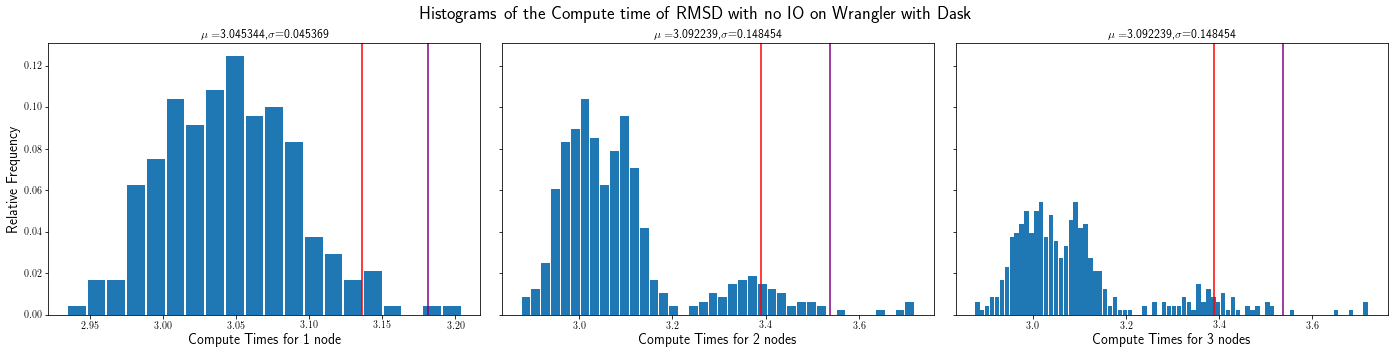

In [24]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerWranglerDask1, histWranglerDask1, align='center', width=widthWranglerDask1)
axes[1].bar(centerWranglerDask2, histWranglerDask2, align='center', width=widthWranglerDask2)
axes[2].bar(centerWranglerDask3, histWranglerDask3, align='center', width=widthWranglerDask3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Wrangler with Dask',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%(meanWranglerDask1,stdWranglerDask1),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%(meanWranglerDask2,stdWranglerDask2),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%(meanWranglerDask3,stdWranglerDask3),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].axvline(x=(meanWranglerDask1+2*stdWranglerDask1),color='red')
axes[1].axvline(x=(meanWranglerDask2+2*stdWranglerDask2),color='red')
axes[2].axvline(x=(meanWranglerDask3+2*stdWranglerDask3),color='red')
axes[0].axvline(x=(meanWranglerDask1+3*stdWranglerDask1),color='purple')
axes[1].axvline(x=(meanWranglerDask2+3*stdWranglerDask2),color='purple')
axes[2].axvline(x=(meanWranglerDask3+3*stdWranglerDask3),color='purple')
axes[0].set_ylabel('Relative Frequency',fontsize=14)

In [25]:
histCometSpark1,edgesCometSpark1,meanCometSpark1,stdCometSpark1,_ = task_hist(df=comet_spark,div=1000.0,node=1,bins=20)
histCometSpark2,edgesCometSpark2,meanCometSpark2,stdCometSpark2,_ = task_hist(df=comet_spark,div=1000.0,node=2,bins=40)
histCometSpark3,edgesCometSpark3,meanCometSpark3,stdCometSpark3,_ = task_hist(df=comet_spark,div=1000.0,node=3,bins=80)

widthCometSpark1 = 0.9 * (edgesCometSpark1[1] - edgesCometSpark1[0])
centerCometSpark1 = (edgesCometSpark1[:-1] + edgesCometSpark1[1:]) / 2

widthCometSpark2 = 0.9 * (edgesCometSpark2[1] - edgesCometSpark2[0])
centerCometSpark2 = (edgesCometSpark2[:-1] + edgesCometSpark2[1:]) / 2

widthCometSpark3 = 0.9 * (edgesCometSpark3[1] - edgesCometSpark3[0])
centerCometSpark3 = (edgesCometSpark3[:-1] + edgesCometSpark3[1:]) / 2

print 'Comet',meanCometSpark1,stdCometSpark1
print 'Comet',meanCometSpark2,stdCometSpark2
print 'Comet',meanCometSpark3,stdCometSpark3

Comet 6.0879125 0.284631003602
Comet 6.23252083333 0.2250649166
Comet 5.94370416667 0.188328774705


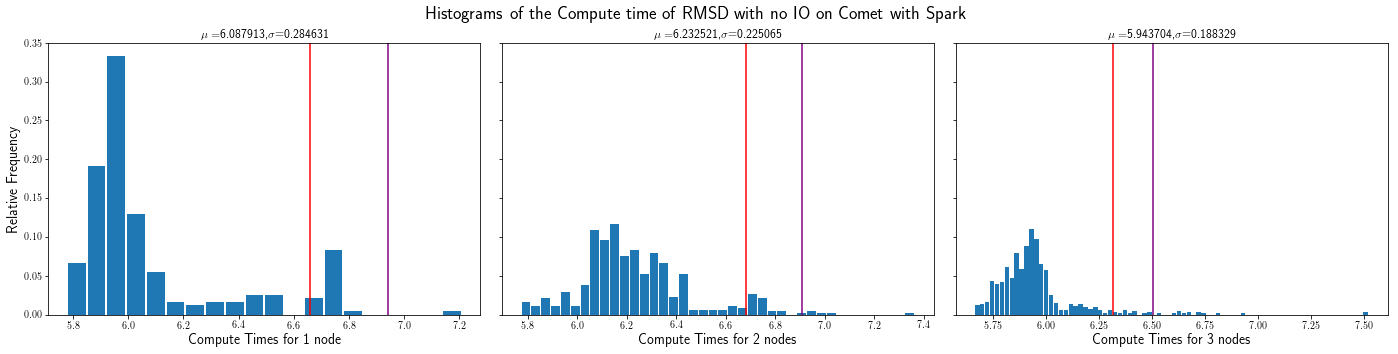

In [26]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerCometSpark1, histCometSpark1, align='center', width=widthCometSpark1)
axes[1].bar(centerCometSpark2, histCometSpark2, align='center', width=widthCometSpark2)
axes[2].bar(centerCometSpark3, histCometSpark3, align='center', width=widthCometSpark3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Comet with Spark',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%(meanCometSpark1,stdCometSpark1),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%(meanCometSpark2,stdCometSpark2),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%(meanCometSpark3,stdCometSpark3),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].axvline(x=(meanCometSpark1+2*stdCometSpark1),color='red')
axes[1].axvline(x=(meanCometSpark2+2*stdCometSpark2),color='red')
axes[2].axvline(x=(meanCometSpark3+2*stdCometSpark3),color='red')
axes[0].axvline(x=(meanCometSpark1+3*stdCometSpark1),color='purple')
axes[1].axvline(x=(meanCometSpark2+3*stdCometSpark2),color='purple')
axes[2].axvline(x=(meanCometSpark3+3*stdCometSpark3),color='purple')
axes[0].set_ylabel('Relative Frequency',fontsize=14)

In [27]:
histWranglerSpark1,edgesWranglerSpark1,meanWranglerSpark1,stdWranglerSpark1,_ = task_hist(df=wrangler_spark,div=1000.0,node=1,bins=20)
histWranglerSpark2,edgesWranglerSpark2,meanWranglerSpark2,stdWranglerSpark2,_ = task_hist(df=wrangler_spark,div=1000.0,node=2,bins=40)
histWranglerSpark3,edgesWranglerSpark3,meanWranglerSpark3,stdWranglerSpark3,_ = task_hist(df=wrangler_spark,div=1000.0,node=3,bins=80)

widthWranglerSpark1 = 0.9 * (edgesWranglerSpark1[1] - edgesWranglerSpark1[0])
centerWranglerSpark1 = (edgesWranglerSpark1[:-1] + edgesWranglerSpark1[1:]) / 2

widthWranglerSpark2 = 0.9 * (edgesWranglerSpark2[1] - edgesWranglerSpark2[0])
centerWranglerSpark2 = (edgesWranglerSpark2[:-1] + edgesWranglerSpark2[1:]) / 2

widthWranglerSpark3 = 0.9 * (edgesWranglerSpark3[1] - edgesWranglerSpark3[0])
centerWranglerSpark3 = (edgesWranglerSpark3[:-1] + edgesWranglerSpark3[1:]) / 2

print 'Wrangler',meanWranglerSpark1,stdWranglerSpark1
print 'Wrangler',meanWranglerSpark2,stdWranglerSpark2
print 'Wrangler',meanWranglerSpark3,stdWranglerSpark3

Wrangler 10.3276166667 2.67382590097
Wrangler 9.60982916667 0.869207855713
Wrangler 9.75909722222 0.858418973339


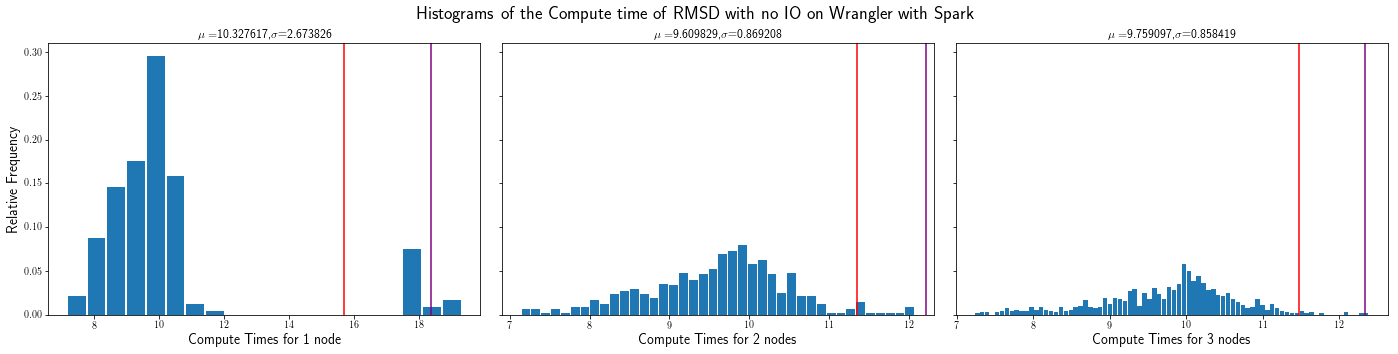

In [28]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerWranglerSpark1, histWranglerSpark1, align='center', width=widthWranglerSpark1)
axes[1].bar(centerWranglerSpark2, histWranglerSpark2, align='center', width=widthWranglerSpark2)
axes[2].bar(centerWranglerSpark3, histWranglerSpark3, align='center', width=widthWranglerSpark3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Wrangler with Spark',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%(meanWranglerSpark1,stdWranglerSpark1),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%(meanWranglerSpark2,stdWranglerSpark2),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%(meanWranglerSpark3,stdWranglerSpark3),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].axvline(x=(meanWranglerSpark1+2*stdWranglerSpark1),color='red')
axes[1].axvline(x=(meanWranglerSpark2+2*stdWranglerSpark2),color='red')
axes[2].axvline(x=(meanWranglerSpark3+2*stdWranglerSpark3),color='red')
axes[0].axvline(x=(meanWranglerSpark1+3*stdWranglerSpark1),color='purple')
axes[1].axvline(x=(meanWranglerSpark2+3*stdWranglerSpark2),color='purple')
axes[2].axvline(x=(meanWranglerSpark3+3*stdWranglerSpark3),color='purple')
axes[0].set_ylabel('Relative Frequency',fontsize=14)

In [29]:
histCometRp1,edgesCometRp1,meanCometRp1,stdCometRp1,_ = task_hist(df=comet_rp,node=1,bins=20)
histCometRp2,edgesCometRp2,meanCometRp2,stdCometRp2,_ = task_hist(df=comet_rp,node=2,bins=40)
histCometRp3,edgesCometRp3,meanCometRp3,stdCometRp3,_ = task_hist(df=comet_rp,node=3,bins=80)

widthCometRp1 = 0.9 * (edgesCometRp1[1] - edgesCometRp1[0])
centerCometRp1 = (edgesCometRp1[:-1] + edgesCometRp1[1:]) / 2

widthCometRp2 = 0.9 * (edgesCometRp2[1] - edgesCometRp2[0])
centerCometRp2 = (edgesCometRp2[:-1] + edgesCometRp2[1:]) / 2

widthCometRp3 = 0.9 * (edgesCometRp3[1] - edgesCometRp3[0])
centerCometRp3 = (edgesCometRp3[:-1] + edgesCometRp3[1:]) / 2

print 'Comet',meanCometRp1,stdCometRp1
print 'Comet',meanCometRp2,stdCometRp2
print 'Comet',meanCometRp3,stdCometRp3

Comet 8.01733999848 1.26384217147
Comet 7.40589861185 0.53652283937
Comet 7.44090231922 0.492485622887


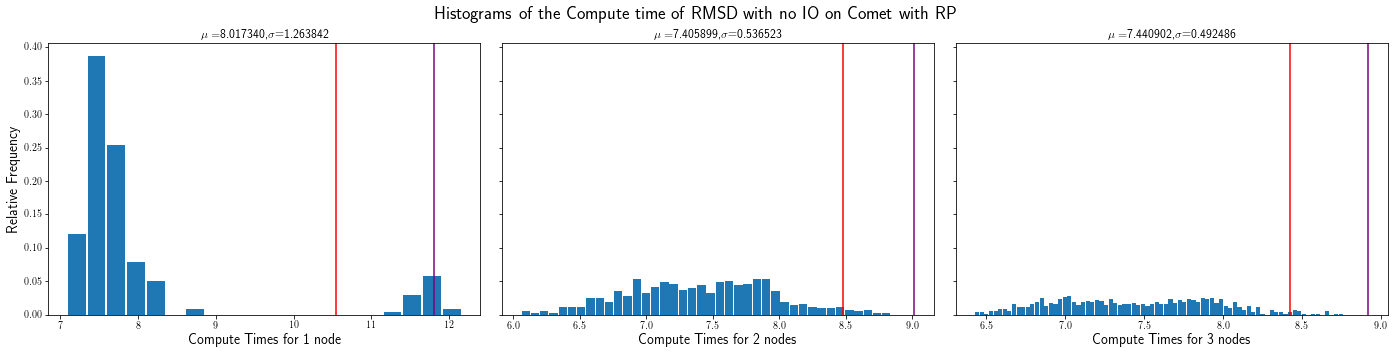

In [30]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerCometRp1, histCometRp1, align='center', width=widthCometRp1)
axes[1].bar(centerCometRp2, histCometRp2, align='center', width=widthCometRp2)
axes[2].bar(centerCometRp3, histCometRp3, align='center', width=widthCometRp3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Comet with RP',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%(meanCometRp1,stdCometRp1),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%(meanCometRp2,stdCometRp2),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%(meanCometRp3,stdCometRp3),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].axvline(x=(meanCometRp1+2*stdCometRp1),color='red')
axes[1].axvline(x=(meanCometRp2+2*stdCometRp2),color='red')
axes[2].axvline(x=(meanCometRp3+2*stdCometRp3),color='red')
axes[0].axvline(x=(meanCometRp1+3*stdCometRp1),color='purple')
axes[1].axvline(x=(meanCometRp2+3*stdCometRp2),color='purple')
axes[2].axvline(x=(meanCometRp3+3*stdCometRp3),color='purple')
axes[0].set_ylabel('Relative Frequency',fontsize=14)

In [31]:
histWranglerRp1,edgesWranglerRp1,meanWranglerRp1,stdWranglerRp1,_ = task_hist(df=wrangler_rp,node=1,bins=20)
histWranglerRp2,edgesWranglerRp2,meanWranglerRp2,stdWranglerRp2,_ = task_hist(df=wrangler_rp,node=2,bins=40)
histWranglerRp3,edgesWranglerRp3,meanWranglerRp3,stdWranglerRp3,_ = task_hist(df=wrangler_rp,node=3,bins=80)

widthWranglerRp1 = 0.9 * (edgesWranglerRp1[1] - edgesWranglerRp1[0])
centerWranglerRp1 = (edgesWranglerRp1[:-1] + edgesWranglerRp1[1:]) / 2

widthWranglerRp2 = 0.9 * (edgesWranglerRp2[1] - edgesWranglerRp2[0])
centerWranglerRp2 = (edgesWranglerRp2[:-1] + edgesWranglerRp2[1:]) / 2

widthWranglerRp3 = 0.9 * (edgesWranglerRp3[1] - edgesWranglerRp3[0])
centerWranglerRp3 = (edgesWranglerRp3[:-1] + edgesWranglerRp3[1:]) / 2

print 'Wrangler',meanWranglerRp1,stdWranglerRp1
print 'Wrangler',meanWranglerRp2,stdWranglerRp2
print 'Wrangler',meanWranglerRp3,stdWranglerRp3

Wrangler 24.0835950017 1.85794513892
Wrangler 18.061248755 6.15951907394
Wrangler 16.607791387 5.45704290191


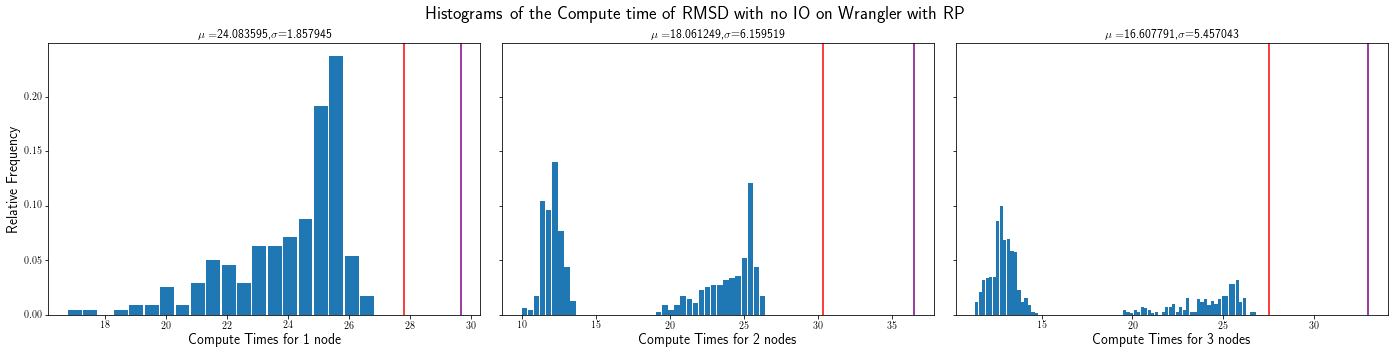

In [32]:
fig,axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerWranglerRp1, histWranglerRp1, align='center', width=widthWranglerRp1)
axes[1].bar(centerWranglerRp2, histWranglerRp2, align='center', width=widthWranglerRp2)
axes[2].bar(centerWranglerRp3, histWranglerRp3, align='center', width=widthWranglerRp3)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Wrangler with RP',fontsize=18)
axes[0].set_title('$\mu=$%f,$\sigma$=%f'%(meanWranglerRp1,stdWranglerRp1),fontsize=12)
axes[1].set_title('$\mu=$%f,$\sigma$=%f'%(meanWranglerRp2,stdWranglerRp2),fontsize=12)
axes[2].set_title('$\mu=$%f,$\sigma$=%f'%(meanWranglerRp3,stdWranglerRp3),fontsize=12)
axes[0].set_xlabel('Compute Times for 1 node', fontsize=14)
axes[1].set_xlabel('Compute Times for 2 nodes',fontsize=14)
axes[2].set_xlabel('Compute Times for 3 nodes',fontsize=14)
axes[0].axvline(x=(meanWranglerRp1+2*stdWranglerRp1),color='red')
axes[1].axvline(x=(meanWranglerRp2+2*stdWranglerRp2),color='red')
axes[2].axvline(x=(meanWranglerRp3+2*stdWranglerRp3),color='red')
axes[0].axvline(x=(meanWranglerRp1+3*stdWranglerRp1),color='purple')
axes[1].axvline(x=(meanWranglerRp2+3*stdWranglerRp2),color='purple')
axes[2].axvline(x=(meanWranglerRp3+3*stdWranglerRp3),color='purple')
axes[0].set_ylabel('Relative Frequency',fontsize=14)